# Ames Housing Sale Predictions - Data Cleaning & EDA

## Problem Statement
Zillow has recently hired a team of data scientists to improve its methods of home price prediction. As a part of this team, we have been tasked with creating a machine learning model aimed at predicting the price of a home in Ames, Iowa at sale based on a publically available dataset. The Ames dataset contains information from the Ames Assessor’s Office used in computing assessed values for individual residential properties sold in Ames, IA from 2006 to 2010.

This will be a proof-of-concept model geographically restricted to the city of Ames. Zillow would like to determine if it is worth allocating financial resources to this method of prediction in order to expand it to serve as Zillow's primary prediction engine for home sale prices across the US.

## Background

The Real Estate market has been looking to improve the ways that it predicts home prices to better help customers shop for the home that meets their needs and is within their budget. In pursuit of this goal, the top digital Real Estate companies on the market have agreed to join a competition focused on adapting machine learning techniques to the housing market. Using the Ames, Iowa housing dataset, each company will submit predictions from their two best models to determine if applying machine learning in this way is a viable strategy and to prove to the public who is the one true Real Estate company to rule them all.

<div align="center">
<img src="https://media.tenor.com/SJQuPQYJoB0AAAAd/one-ring-lotr.gif" width="250"/>
</div>

In light of this, Zillow's goal is to be able to produce higher accuracy predictions than its competitors (i.e. Trulia, Redfin, Realtor.com, etc.). Pre-submissions from each company are accepted until 11:59 pm on 2/16/23. 70% of the Ames testing data will be used to produce a score to judge models for all pre-submissions. Once submissions close, the remaining 30% will be used to determine the final scores.

All submitted models will be compared using the metric of Mean Squared Error (MSE). The lower the MSE score is, the better the model performed.

$$MSE = \frac{1}{n}\sum (y_i - \hat{y}_i)^2$$

To achieve Zillow's goals, our team will utilize three types of linear regression models based on the Ames Housing Dataset that was provided to all companies for this Kaggle competition. These models will be Ordinary Least Squares, Ridge Regression, and LASSO Regression. The top two predictions of the best performing models will be submitted to Kaggle for review.

Because the purpose of this model is solely based on predicting home sale pricing, performance is prioritized over creating a "white-box" model. Zillow has instructed our team that understanding the internal components of the model is not as important as accurate predictions. Proof-of-concept success will be determined by producing an $R^2$ of above 0.90 on the provided data as well as an MSE below 30000 on Kaggle submission.

## Contents:
- [Problem Statement](#Problem-Statement)
- [Background](#Background)
- [Datasets](#Datasets)
- [Imports & Data](#Imports-\&-Data)
- [Data Cleaning](#Data-Cleaning)
- [EDA](#EDA)
- [Outliers](#Outliers)
- [Save Clean Data](#Save-Clean-Data)

## Datasets

The entire data documentation provided by the Ames Assessor’s Office can be found here: https://jse.amstat.org/v19n3/decock/DataDocumentation.txt

The data dictionary contains all features, provided and engineered, that were used in the models.
- Dummy variables are grouped by their original variable name and denoted under *'Type'*.
- Ordinal features that were converted to a numeric scale are also noted under *'Type'*.
- Polynomial Features are grouped by the pair of features that created them.

### Data Dictionary:

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**Id**|*Discrete*|Ames, IA Housing|ID number for each home|
|**PID**|*Nominal*|Ames, IA Housing|Parcel identification number  - can be used with city website for parcel review|
|**MS SubClass**|*Nominal*|Ames, IA Housing|Identifies the type of dwelling involved in the sale|
|**MS Zoning**|*Nominal (Dummy)*|Ames, IA Housing|Identifies the general zoning classification of the sale|
|**Lot Frontage**|*Continuous*|Ames, IA Housing|Linear feet of street connected to property|
|**Lot Area**|*Continuous*|Ames, IA Housing|Lot size in square feet|
|**Street**|*Nominal*|Ames, IA Housing|Type of road access to property|
|**Alley**|*Nominal*|Ames, IA Housing|Type of alley access to property|
|**Lot Shape**|*Ordinal (Dummy)*|Ames, IA Housing|General shape of property|
|**Land Contour**|*Nominal (Dummy)*|Ames, IA Housing|Flatness of the property|
|**Utilities**|*Ordinal*|Ames, IA Housing|Type of utilities available|
|**Lot Config**|*Nominal (Dummy)*|Ames, IA Housing|Lot configuration|
|**Land Slope**|*Ordinal*|Ames, IA Housing|Slope of property|
|**Neighborhood**|*Nominal (Dummy)*|Ames, IA Housing|Physical locations within Ames city limits|
|**Condition 1**|*Nominal (Dummy)*|Ames, IA Housing|Proximity to various conditions|
|**Condition 2**|*Nominal*|Ames, IA Housing|Proximity to various conditions (if more than one is present)|
|**Bldg Type**|*Nominal (Dummy)*|Ames, IA Housing|Type of dwelling|
|**House Style**|*Nominal (Dummy)*|Ames, IA Housing|Style of dwelling|
|**Overall Qual**|*Ordinal*|Ames, IA Housing|Rates the overall material and finish of the house|
|**Overall Cond**|*Ordinal*|Ames, IA Housing|Rates the overall condition of the house|
|**Year Built**|*Discrete*|Ames, IA Housing|Original construction date|
|**Year Remod/Add**|*Discrete*|Ames, IA Housing|Remodel date (same as construction date if no remodeling or additions)|
|**Roof Style**|*Nominal (Dummy)*|Ames, IA Housing|Type of roof|
|**Roof Matl**|*Nominal*|Ames, IA Housing|Roof material|
|**Exterior 1st**|*Nominal (Dummy)*|Ames, IA Housing|Exterior covering on house|
|**Exterior 2nd**|*Nominal (Dummy)*|Ames, IA Housing|Exterior covering on house (if more than one material)|
|**Mas Vnr Type**|*Nominal (Dummy)*|Ames, IA Housing|Masonry veneer type|
|**Mas Vnr Area**|*Continuous*|Ames, IA Housing|Masonry veneer area in square feet|
|**Exter Qual**|*Ordinal (Numeric)*|Ames, IA Housing|Evaluates the quality of the material on the exterior |
|**Exter Cond**|*Ordinal (Numeric)*|Ames, IA Housing|Evaluates the present condition of the material on the exterior|
|**Foundation**|*Nominal (Dummy)*|Ames, IA Housing|Type of foundation|
|**Bsmt Qual**|*Ordinal (Numeric)*|Ames, IA Housing|Evaluates the height of the basement|
|**Bsmt Cond**|*Ordinal (Numeric)*|Ames, IA Housing|Evaluates the general condition of the basement|
|**Bsmt Exposure**|*Ordinal (Numeric)*|Ames, IA Housing|Refers to walkout or garden level walls|
|**BsmtFin Type 1**|*Ordinal (Numeric)*|Ames, IA Housing|Rating of basement finished area|
|**BsmtFin SF 1**|*Continuous*|Ames, IA Housing|Type 1 finished square feet|
|**BsmtFin Type 2**|*Ordinal (Numeric)*|Ames, IA Housing|Rating of basement finished area (if multiple types)|
|**BsmtFin SF 2**|*Continuous*|Ames, IA Housing|Type 2 finished square feet|
|**Bsmt Unf SF**|*Continuous*|Ames, IA Housing|Unfinished square feet of basement area|
|**Total Bsmt SF**|*Continuous*|Ames, IA Housing|Total square feet of basement area|
|**Heating**|*Nominal*|Ames, IA Housing|Type of heating|
|**Heating QC**|*Ordinal (Numeric)*|Ames, IA Housing|Heating quality and condition|
|**Central Air**|*Nominal (Dummy)*|Ames, IA Housing|Central air conditioning|
|**Electrical**|*Ordinal (Numeric)*|Ames, IA Housing|Electrical system|
|**1st Flr SF**|*Continuous*|Ames, IA Housing|First Floor square feet|
|**2nd Flr SF**|*Continuous*|Ames, IA Housing|Second floor square feet|
|**Low Qual Fin SF**|*Continuous*|Ames, IA Housing|Low quality finished square feet (all floors)|
|**Gr Liv Area**|*Continuous*|Ames, IA Housing|Above grade (ground) living area square feet|
|**Bsmt Full Bath**|*Discrete*|Ames, IA Housing|Basement full bathrooms|
|**Bsmt Half Bath**|*Discrete*|Ames, IA Housing|Basement half bathrooms|
|**Full Bath**|*Discrete*|Ames, IA Housing|Full bathrooms above grade|
|**Half Bath**|*Discrete*|Ames, IA Housing|Half baths above grade|
|**Bedroom AbvGr**|*Discrete*|Ames, IA Housing|Bedrooms above grade (does NOT include basement bedrooms)|
|**Kitchen AbvGr**|*Discrete*|Ames, IA Housing|Kitchens above grade|
|**Kitchen Qual**|*Ordinal (Numeric)*|Ames, IA Housing|Kitchen quality|
|**TotRms AbvGrd**|*Discrete*|Ames, IA Housing|Total rooms above grade (does not include bathrooms)|
|**Functional**|*Ordinal*|Ames, IA Housing|Home functionality (Assume typical unless deductions are warranted)|
|**Fireplaces**|*Discrete*|Ames, IA Housing|Number of fireplaces|
|**Fireplace Qu**|*Ordinal (Numeric)*|Ames, IA Housing|Number of fireplaces|
|**Garage Type**|*Nominal (Dummy)*|Ames, IA Housing|Garage location|
|**Garage Yr Blt**|*Discrete*|Ames, IA Housing|Year garage was built|
|**Garage Finish**|*Ordinal (Numeric)*|Ames, IA Housing|Interior finish of the garage|
|**Garage Cars**|*Discrete*|Ames, IA Housing|Size of garage in car capacity|
|**Garage Area**|*Continuous*|Ames, IA Housing|Size of garage in square feet|
|**Garage Qual**|*Ordinal*|Ames, IA Housing|Garage quality|
|**Garage Cond**|*Ordinal*|Ames, IA Housing|Garage condition|
|**Paved Drive**|*Ordinal (Numeric)*|Ames, IA Housing|Paved driveway|
|**Wood Deck SF**|*Continuous*|Ames, IA Housing|Wood deck area in square feet|
|**Open Porch SF**|*Continuous*|Ames, IA Housing|Open porch area in square feet|
|**Enclosed Porch**|*Continuous*|Ames, IA Housing|Enclosed porch area in square feet|
|**3Ssn Porch**|*Continuous*|Ames, IA Housing|Three season porch area in square feet|
|**Screen Porch**|*Continuous*|Ames, IA Housing|Screen porch area in square feet|
|**Pool Area**|*Continuous*|Ames, IA Housing|Pool area in square feet|
|**Pool QC**|*Ordinal*|Ames, IA Housing|Pool quality|
|**Fence**|*Ordinal (Numeric)*|Ames, IA Housing|Fence quality|
|**Misc Feature**|*Nominal*|Ames, IA Housing|Miscellaneous feature not covered in other categories|
|**Misc Val**|*Continuous*|Ames, IA Housing|$ Value of miscellaneous feature|
|**Mo Sold**|*Discrete*|Ames, IA Housing|Month Sold (MM)|
|**Yr Sold**|*Discrete*|Ames, IA Housing|Year Sold (YYYY)|
|**Sale Type**|*Nominal*|Ames, IA Housing|Type of sale|
|**Sale Condition**|*Nominal*|Ames, IA Housing|Condition of sale|
|**SalePrice**|*Continuous*|Ames, IA Housing|Sale price $$|
|**Total Bath**|*Discrete*|Ames, IA Housing - Engineered|Total Bathrooms|
|**Total Area**|*Continuous*|Ames, IA Housing - Engineered|Basement and above grade living area combined (square feet)|
|**Outside Amenity Area**|*Continuous*|Ames, IA Housing - Engineered|All outside area combined (including all porches)|
|**pf_overall**|*Continuous - Polynomial*|Ames, IA Housing|Polynomial features consisting of ('Overall Qual','Gr Liv Area')|
|**pf_garage**|*Continuous - Polynomial*|Ames, IA Housing|Polynomial features consisting of ('Garage Area', 'Garage Cars')|
|**pf_ext**|*Discrete - Polynomial*|Ames, IA Housing|Polynomial features consisting of ('Exter Qual', 'Exter Cond')|
|**pf_bsmt**|*Continuous - Polynomial*|Ames, IA Housing|Polynomial features consisting of ('Bsmt Qual', 'Total Bsmt SF', 'Bsmt Cond', 'BsmtFin SF 1', 'Bsmt Exposure')|
|**pf_fire**|*Discrete - Polynomial*|Ames, IA Housing|Polynomial features consisting of ('Fireplaces', 'Fireplace Qu')|
|**pf_mas**|*Continuous - Polynomial*|Ames, IA Housing|Polynomial features consisting of ('Mas Vnr Area', 'Mas_Vnr_Stone')|
|**pf_total_qual**|*Discrete - Polynomial*|Ames, IA Housing|Polynomial features consisting of ('Overall Qual', 'Exter Qual', 'Kitchen Qual', 'Bsmt Qual', 'Heating QC')|

## Imports & Data

#### Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Read In Data

In [2]:
# define paths
path_raw_data = '../datasets/01_raw/'
path_cleaned_data = '../datasets/02_cleaned/'

In [3]:
# Read in data
df_train = pd.read_csv(f'{path_raw_data}train.csv')
df_test = pd.read_csv(f'{path_raw_data}test.csv')

## Review Raw Data
**Raw data summary:**
- Train dataset has 2051 entries with 81 features (includes SalePrice)
- Test dataset has 878 entries with 80 features (excludes SalePrice)

**Features:**
- 38 features are numeric
- 42 features are categorical

In [4]:
# Review shape and first 5 rows of train data
print(df_train.shape)
df_train.head()

(2051, 81)


,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [5]:
# Review shape and first 5 rows of test data
print(df_test.shape)
df_test.head()

(878, 80)


,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


### Review all provided features
Data documentation found here: https://jse.amstat.org/v19n3/decock/DataDocumentation.txt

### Determine which are number of numeric and categorical features

In [6]:
features_numeric = sum(df_test.dtypes != 'object')
features_categorical = sum(df_test.dtypes == 'object')
print(f'{features_numeric} numeric features')
print(f'{features_categorical} categorical features')

38 numeric features
42 categorical features


In [7]:
df_train.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

### Review numeric description statistics

In [8]:
df_train.describe().T # transpose for easier viewing

,count,mean,std,min,25%,50%,75%,max
Id,2051.0,1.474034e+03,8.439808e+02,1.0,753.5,1486.0,2.198000e+03,2930.0
PID,2051.0,7.135900e+08,1.886918e+08,526301100.0,528458140.0,535453200.0,9.071801e+08,924152030.0
MS SubClass,2051.0,5.700878e+01,4.282422e+01,20.0,20.0,50.0,7.000000e+01,190.0
Lot Frontage,1721.0,6.905520e+01,2.326065e+01,21.0,58.0,68.0,8.000000e+01,313.0
Lot Area,2051.0,1.006521e+04,6.742489e+03,1300.0,7500.0,9430.0,1.151350e+04,159000.0
Overall Qual,2051.0,6.112140e+00,1.426271e+00,1.0,5.0,6.0,7.000000e+00,10.0
Overall Cond,2051.0,5.562165e+00,1.104497e+00,1.0,5.0,5.0,6.000000e+00,9.0
Year Built,2051.0,1.971709e+03,3.017789e+01,1872.0,1953.5,1974.0,2.001000e+03,2010.0
Year Remod/Add,2051.0,1.984190e+03,2.103625e+01,1950.0,1964.5,1993.0,2.004000e+03,2010.0
Mas Vnr Area,2029.0,9.969591e+01,1.749631e+02,0.0,0.0,0.0,1.610000e+02,1600.0


### Display missing values

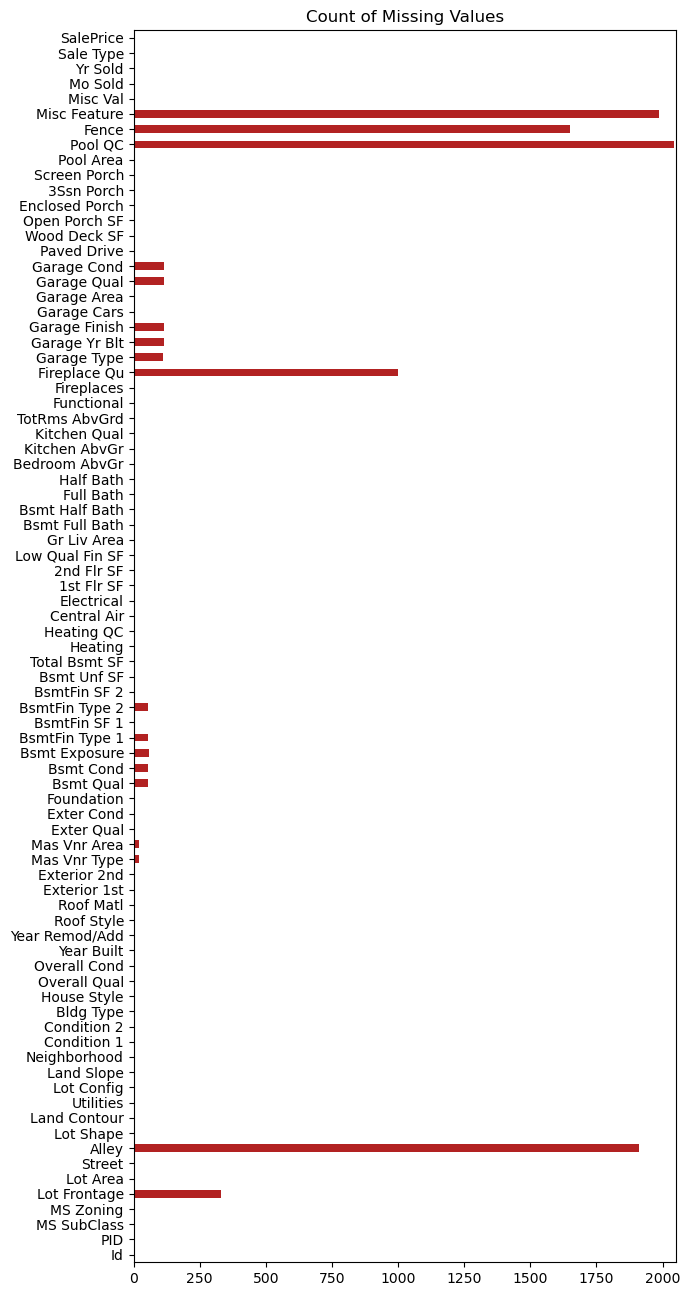

In [9]:
# Plot missing values
plt.figure(figsize=(7,16))
df_train.isna().sum().plot(kind='barh', color='firebrick') # Code modified from Wednesday breakfast-hour
plt.title('Count of Missing Values');
plt.xlim(0,2051);

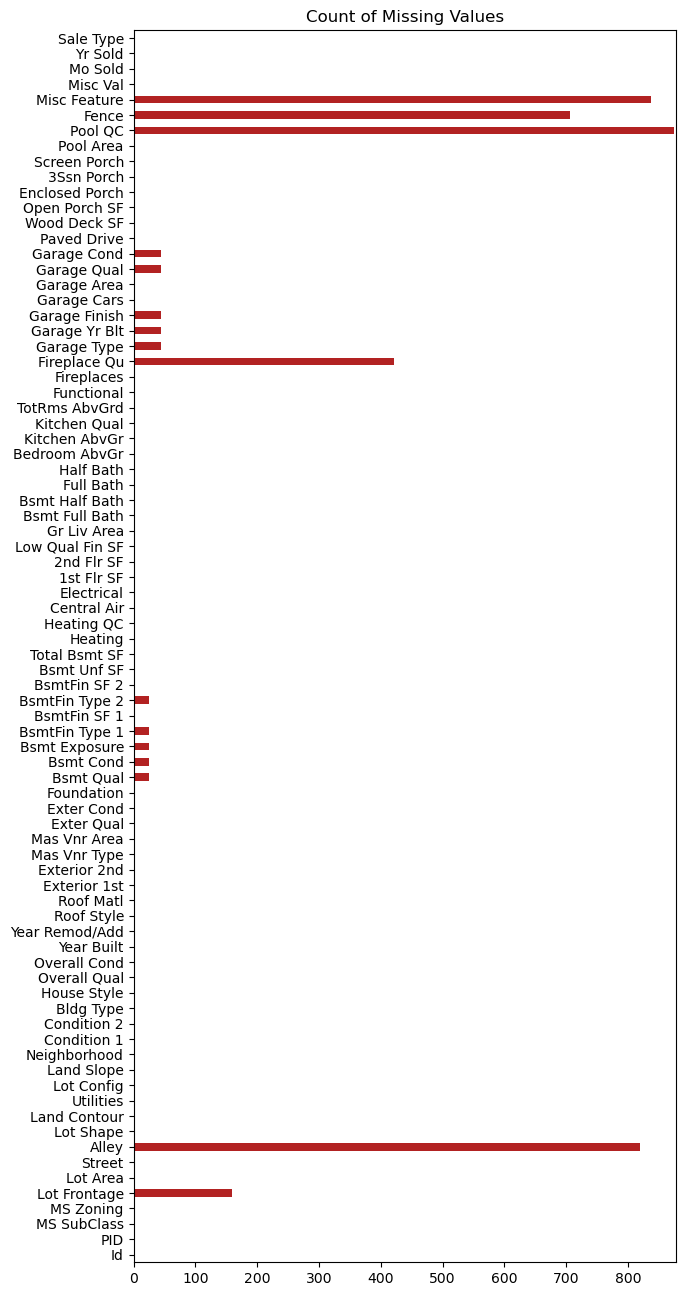

In [10]:
# Plot missing values
plt.figure(figsize=(7,16))
df_test.isna().sum().plot(kind='barh', color='firebrick') # Code modified from Wednesday breakfast-hour
plt.title('Count of Missing Values');
plt.xlim(0,878);

### Initial Observations:
Some features stored as numbers should be categories:
- Id: ID number
- PID (Nominal): Parcel identification number  - can be used with city website for parcel review.
    - More information: https://blog.realmanage.com/en-us/pid-pud-how-impact-community-association
- MS SubClass (Nominal): Identifies the type of dwelling involved in the sale.
- Year Built (Discrete): Original construction date
- Year Remod/Add (Discrete): Remodel date (same as construction date if no remodeling or additions)
    
    
Features with Missing Values **(Bold = high number of NaNs)** *(italics = contains numeric NaNs)*:
- *Lot Frontage (Continuous): Linear feet of street connected to property*
- **Alley (Nominal): Type of alley access to property**
- Mas Vnr Type (Nominal): Masonry veneer type
- *Mas Vnr Area (Continuous): Masonry veneer area in square feet*
- Bsmt Qual (Ordinal): Evaluates the height of the basement
- Bsmt Cond (Ordinal): Evaluates the general condition of the basement
- Bsmt Exposure	(Ordinal): Refers to walkout or garden level walls
- BsmtFin Type 1	(Ordinal): Rating of basement finished area
- BsmtFinType 2	(Ordinal): Rating of basement finished area (if multiple types)
- FireplaceQu (Ordinal): Fireplace quality
- Garage Type (Nominal): Garage location
- *Garage Yr Blt (Discrete): Year garage was built*
- Garage Finish (Ordinal): Interior finish of the garage
- Garage Qual (Ordinal): Garage quality
- Garage Cond (Ordinal): Garage condition
- **Pool QC (Ordinal): Pool quality**
- **Fence (Ordinal): Fence quality**
- **Misc Feature (Nominal): Miscellaneous feature not covered in other categories**
    - Elev - Elevator
    - Gar2 - 2nd Garage (if not described in garage section)
    - Othr - Other
    - Shed - Shed (over 100 SF)
    - TenC - Tennis Court
    - NA - None

A majority of the features with missing values can be imputed as 'NA' for none.

'Lot Frontage' and 'Mas Vnr Area' are the only two continuous variables with NaNs. These can be interpreted as 0s, as they correspond to not having any masonry and not having any street front.

## Data Cleaning

### Drop Data
- Drop data with < 10% entries in datasets

In [11]:
print('Value counts:')
print(f'Misc Feature: {df_train["Misc Feature"].value_counts().sum()}')
print(f'Pool QC: {df_train["Pool QC"].value_counts().sum()}')
print(f'Alley: {df_train["Alley"].value_counts().sum()}')

Value counts:
Misc Feature: 65
Pool QC: 9
Alley: 140


In [12]:
print('Value counts:')
print(f'Misc Feature: {df_test["Misc Feature"].value_counts().sum()}')
print(f'Pool QC: {df_test["Pool QC"].value_counts().sum()}')
print(f'Alley: {df_test["Alley"].value_counts().sum()}')

Value counts:
Misc Feature: 41
Pool QC: 4
Alley: 58


In [13]:
df_train = df_train.drop(columns=['Misc Feature', 'Pool QC', 'Alley'])
df_test = df_test.drop(columns=['Misc Feature', 'Pool QC', 'Alley'])

### Impute Missing Values
- According to the data documentation, all categorical features with NaNs are actually 'NA', which means 'none'.
- 'Lot Frontage' and 'Mas Vnr Area' are the only two continuous variables with NaNs. These can be interpreted as 0s, as they correspond to not having any masonry and not having any street front.

In [14]:
# Replace NaNs (code modified from: https://www.geeksforgeeks.org/loop-or-iterate-over-all-or-certain-columns-of-a-dataframe-in-python-pandas/)
for col_name, col_data in df_test.iteritems():
    if col_data.dtype != 'object':
        # Replace missing numeric values with 0s
        df_train[col_name] = np.where(df_train[col_name].isna(), 0, df_train[col_name])
        df_test[col_name] = np.where(df_test[col_name].isna(), 0, df_test[col_name])
    else:
        # Replace missing categorical values with 'NA'
        df_train[col_name] = df_train[col_name].fillna('NA')
        df_test[col_name] = df_test[col_name].fillna('NA')

### Replace 'NA' with 'None' for 'Mas Vnr Type'
- Additionally clean up 'CBlock' that does not appear in both sets of data

In [15]:
# Replace 'NA' with 'None' for variable 'Mas Vnr Type'
# Remove CBlock as a type because only 1 unit has it
df_train['Mas Vnr Type'] = df_train['Mas Vnr Type'].replace(['NA', 'CBlock'], 'None')
df_test['Mas Vnr Type'] = df_test['Mas Vnr Type'].replace(['NA', 'CBlock'], 'None')

### Group Neighborhoods
- Some neighborhoods have few values and do not appear in both data sets. These are grouped to maintain consistency between data sets.

In [16]:
# Group Low-Populated Neighborhoods
neighborhood_group = ['Landmrk', 'GrnHill', 'Greens',  'Blueste']
df_train['Neighborhood'] = df_train['Neighborhood'].replace(to_replace=neighborhood_group, value='Other')
df_test['Neighborhood'] = df_test['Neighborhood'].replace(to_replace=neighborhood_group, value='Other')

### Create a 'Misc' category for 'MS Zoning'
- Some values for 'MS Zoning' have few entries and do not appear in both data sets. These are grouped to maintain consistency between data sets.

In [17]:
# Create a 'Misc' category for non-residential or non-commercial 'MS Zoning' types
df_train['MS Zoning'] = df_train['MS Zoning'].replace(to_replace=['A (agr)', 'I (all)'], value='Misc')
df_test['MS Zoning'] = df_test['MS Zoning'].replace(to_replace=['A (agr)', 'I (all)'], value='Misc')

### Group exterior finishes into 'other' category
- Some exterior finishes have few entries and do not appear in both data sets. These are grouped to maintain consistency between data sets.

In [18]:
# Add to 'other' category for less-common exterior finishes (1st)
finishes_to_group_1 = ['PreCast', 'CBlock', 'Stone',  'AsphShn', 'ImStucc', 'BrkComm']
df_train['Exterior 1st'] = df_train['Exterior 1st'].replace(to_replace=finishes_to_group_1, value='Other')
df_test['Exterior 1st'] = df_test['Exterior 1st'].replace(to_replace=finishes_to_group_1, value='Other')

# Add to 'other' category for less-common exterior finishes (2nd)
finishes_to_group_2 = ['PreCast', 'CBlock', 'Stone',  'AsphShn', 'ImStucc', 'Brk Cmn']
df_train['Exterior 2nd'] = df_train['Exterior 2nd'].replace(to_replace=finishes_to_group_2, value='Other')
df_test['Exterior 2nd'] = df_test['Exterior 2nd'].replace(to_replace=finishes_to_group_2, value='Other')

### Check for missing values
- Ensure that the data cleaning worked properly and all missing values have been imputed.

In [19]:
# Check for missing values:
print(f'Train NaNs: {df_train.isna().sum().sum()}')
print(f'Test NaNs:  {df_test.isna().sum().sum()}')

Train NaNs: 0
Test NaNs:  0


## EDA

### Review Sale Price Distribution
- Sale Price is skewed right

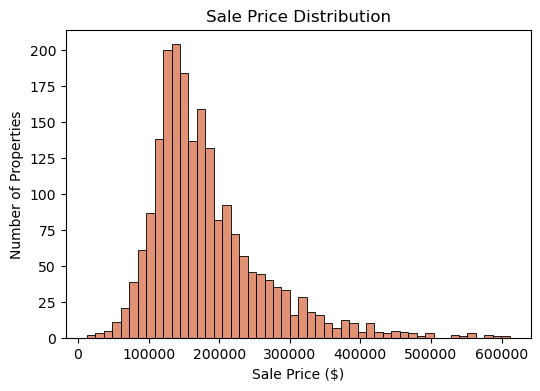

In [42]:
# Review SalePrice distribution
plt.figure(figsize=(6,4))
sns.histplot(data=df_train['SalePrice'], bins=50, color='#d86e47')
plt.title('Sale Price Distribution')
plt.xlabel('Sale Price ($)')
plt.ylabel('Number of Properties');

### Review Correlations

In [21]:
# create sale price correlation for heatmaps
sale_price_corr = df_train.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False)

#### Heatmaps
- Review correlation of numeric features. Determine which to use and test model before feature engineering.
- Review features to determine interaction terms.
- Review numeric features over 50% correlation to SalePrice to then plot to find outliers.

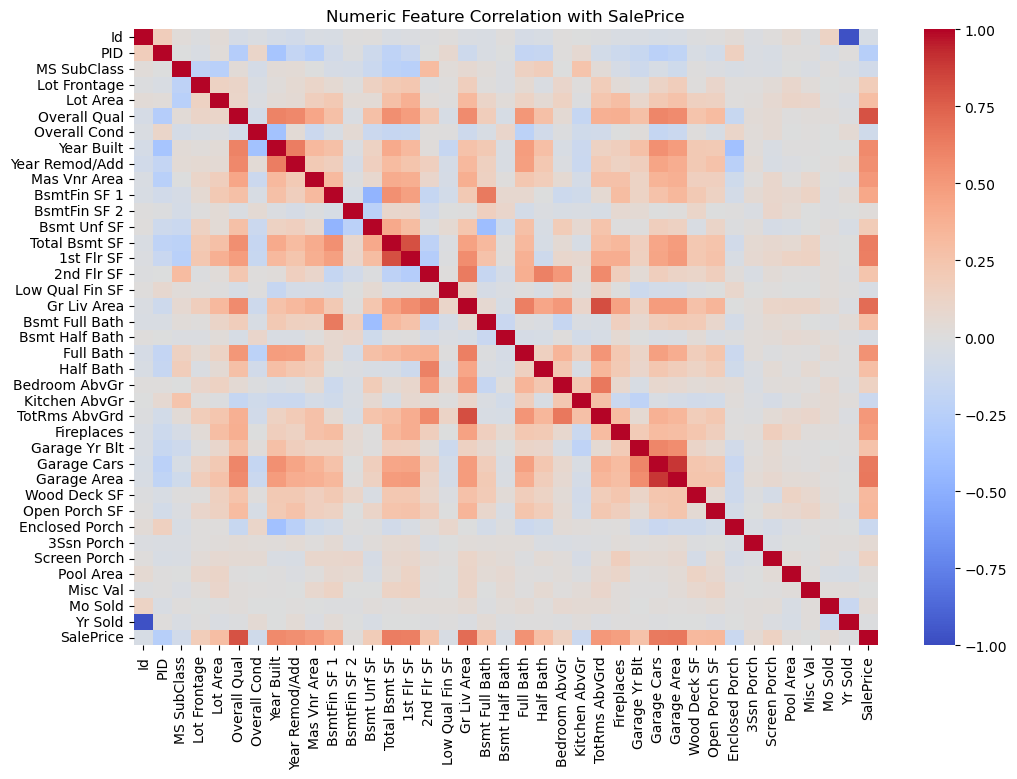

In [22]:
# Full Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_train.corr(),
            cmap='coolwarm',
            annot=False,
            vmin=-1,
            vmax=1);

# labels
plt.title('Numeric Feature Correlation with SalePrice');

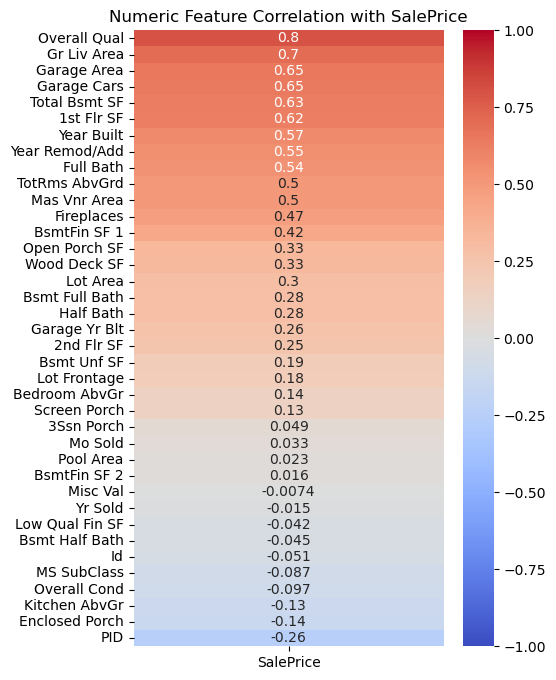

In [23]:
# NOTE: Heatmap only takes into account features that are numeric!
plt.figure(figsize=(5, 8))
sns.heatmap(sale_price_corr[1:],
            cmap='coolwarm',
            annot=True,
            vmin=-1,
            vmax=1);

# labels
plt.title('Numeric Feature Correlation with SalePrice');

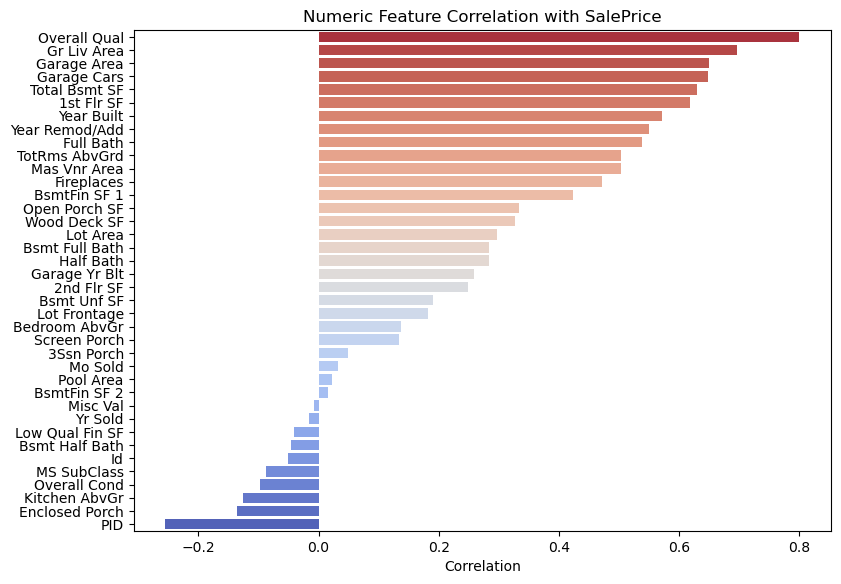

In [46]:
# Bar plot visualization - easier to see scale in addition to colors

# reversed color palette code modified from: https://www.reddit.com/r/learnpython/comments/lvvp8u/comment/gpe6lla/?utm_source=share&utm_medium=web2x&context=3
palette_reverse = sns.color_palette('coolwarm',n_colors=sale_price_corr.shape[0]-1)
palette_reverse.reverse()

# Plot (bar plot code modified from: https://www.geeksforgeeks.org/barplot-using-seaborn-in-python/)
plt.figure(figsize=(9,6.5))
sns.barplot(x=sale_price_corr['SalePrice'][1:].values,
            y=sale_price_corr['SalePrice'][1:].index,
            palette=palette_reverse);

# label
plt.title('Numeric Feature Correlation with SalePrice')
plt.xlabel('Correlation');

## Outliers

### Pairplots

In [25]:
# # All features vs 'SalePrice'
# sns.pairplot(df_train,
#              x_vars = df_train.columns,
#              y_vars=['SalePrice']);

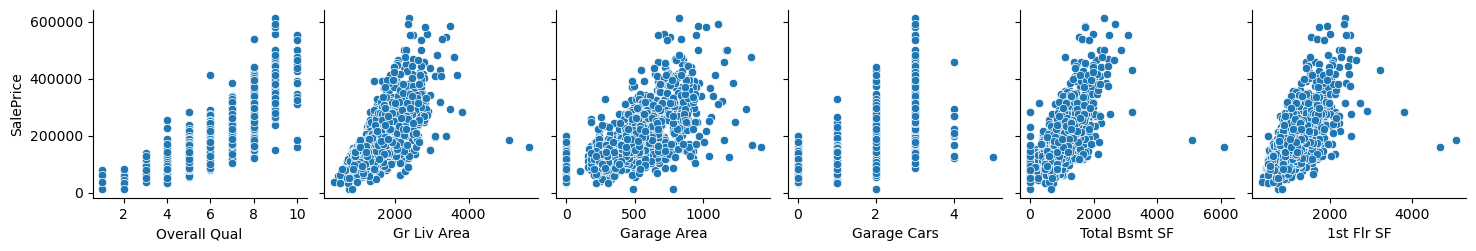

In [26]:
# Features >.5 correaltion scatter plots
sns.pairplot(df_train,
             x_vars = ['Overall Qual',
                       'Gr Liv Area',
                       'Garage Area',
                       'Garage Cars',
                       'Total Bsmt SF',
                       '1st Flr SF'],
             y_vars=['SalePrice']);

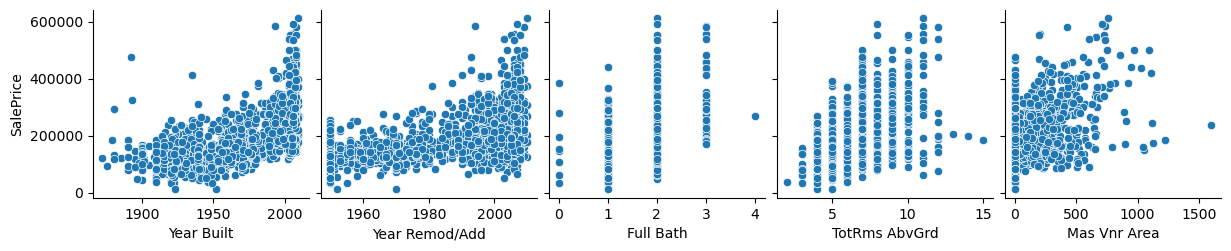

In [27]:
# Features >.5 correaltion scatter plots
sns.pairplot(df_train,
             x_vars = ['Year Built',
                       'Year Remod/Add',
                       'Full Bath',
                       'TotRms AbvGrd',
                       'Mas Vnr Area'],
             y_vars=['SalePrice']);

#### Drop outliers
- 'Gr Liv Area' $< 4000$
- 'Mas Vnr Area' $< 1500$

In [28]:
# Drop 2 very high values for 'Gr Liv Area'
df_train = df_train.loc[df_train['Gr Liv Area'] < 4000]

In [29]:
# Drop 1 very high value for 'Mas Vnr Area'
df_train = df_train.loc[df_train['Mas Vnr Area'] < 1500]

#### Review cleaned pairplots

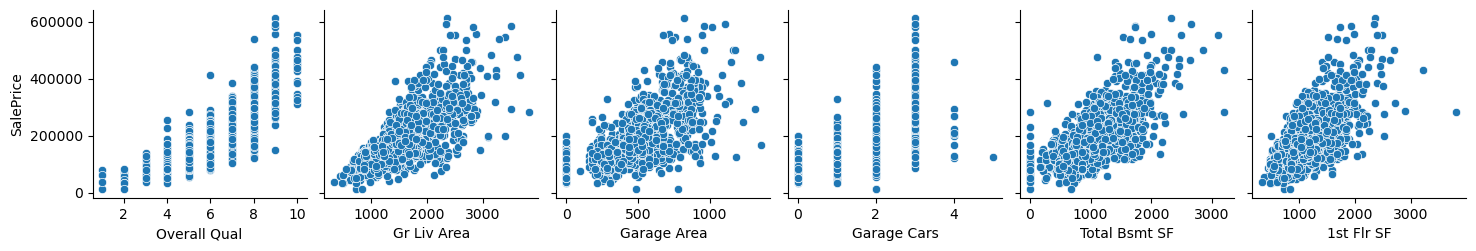

In [30]:
# Features >.5 correaltion scatter plots
sns.pairplot(df_train,
             x_vars = ['Overall Qual',
                       'Gr Liv Area',
                       'Garage Area',
                       'Garage Cars',
                       'Total Bsmt SF',
                       '1st Flr SF'],
             y_vars=['SalePrice']);

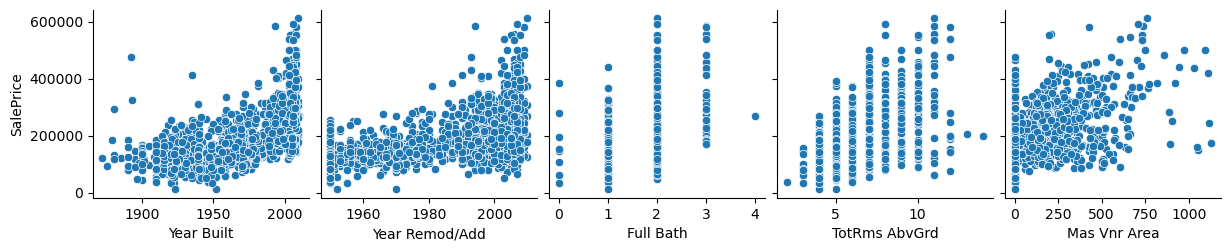

In [31]:
# Features >.5 correaltion scatter plots
sns.pairplot(df_train,
             x_vars = ['Year Built',
                       'Year Remod/Add',
                       'Full Bath',
                       'TotRms AbvGrd',
                       'Mas Vnr Area'],
             y_vars=['SalePrice']);

### Final Data Review

In [32]:
# Check for missing values:
print(f'Train NaNs: {df_train.isna().sum().sum()}')
print(f'Test NaNs:  {df_test.isna().sum().sum()}')

Train NaNs: 0
Test NaNs:  0


In [33]:
df_train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Fence,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,0.0,13517,Pave,IR1,Lvl,AllPub,...,0,0,0,0,NA,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,IR1,Lvl,AllPub,...,0,0,0,0,NA,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,Reg,Lvl,AllPub,...,0,0,0,0,NA,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,Reg,Lvl,AllPub,...,0,0,0,0,NA,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,IR1,Lvl,AllPub,...,0,0,0,0,NA,0,3,2010,WD,138500


In [34]:
df_test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Fence,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Reg,Lvl,AllPub,...,60,112,0,0,0,NA,0,4,2006,WD
1,2718,905108090,90,RL,0.0,9662,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,NA,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,IR1,Lvl,AllPub,...,24,0,0,0,0,NA,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,Reg,Lvl,AllPub,...,0,184,0,0,0,NA,0,7,2007,WD
4,625,535105100,20,RL,0.0,9500,Pave,IR1,Lvl,AllPub,...,76,0,0,185,0,NA,0,7,2009,WD


## Save Clean Data
- Save cleaned data to a csv to load into other notebooks.

In [35]:
df_train.to_csv(f'{path_cleaned_data}train_clean.csv', index=False)
df_test.to_csv(f'{path_cleaned_data}test_clean.csv', index=False)